In [11]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
import mylibrary.datasets as datasets

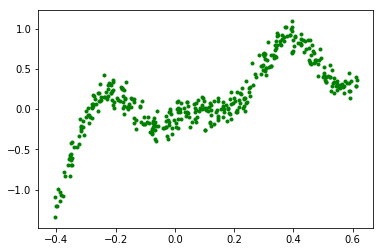

In [12]:
%matplotlib inline
x = np.linspace(0,1,400)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

In [13]:
import mylibrary.splinelib as spline

In [14]:
hidden_1 = 2
# optimizer = tnn.Adam(learning_rate=0.003)
optimizer = tnn.SGD(learning_rate=0.1)
layer1 = tnn.LinearLayer(1, hidden_1, optimizer=optimizer)
# layer2 = tnn.DoubleReluLayer(hidden_1, optimizer=optimizer)
layer2 = spline.SplineVectorLayer(hidden_1, max_points=4)  # 2 -> Linear; 3 -> DoubleRelu
layer3 = tnn.LinearLayer(hidden_1, 1, optimizer=optimizer)

In [15]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1 = layer1.forward(xx)
    a2 = layer2.forward(a1)
    yout = layer3.forward(a2)
    
    loss = tnn.MseLoss.loss(yout, yy)
    dy = tnn.MseLoss.del_loss(yout, yy)
    
    da2 = layer3.backward(dy)
    da1 = layer2.backward(da2)
    dx = layer1.backward(da1)

    layer1.update()
    layer2.update()
    layer3.update()
    
    if step % 100 == 0:
        layer2._maintain_good_spline_()
        
        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.12137906229773003

_______________________
epoch 100
Loss 0.037158857133689

_______________________
epoch 200
Loss 0.03300710703130756

_______________________
epoch 300
Loss 0.029762114699765516

_______________________
epoch 400
Loss 0.026917541303504988

_______________________
epoch 500
Loss 0.024404758400151244

_______________________
epoch 600
Loss 0.021597594574107978

_______________________
epoch 700
Loss 0.01834787421291189

_______________________
epoch 800
Loss 0.013233551994941702

_______________________
epoch 900
Loss 0.007515786553928407

_______________________
epoch 1000
Loss 0.006007530304230932

_______________________
epoch 1100
Loss 0.005573665124588418

_______________________
epoch 1200
Loss 0.005564051527026873

_______________________
epoch 1300
Loss 0.00556312046320755

_______________________
epoch 1400
Loss 0.005562495162255505

_______________________
epoch 1500
Loss 0.005562021229733601

_______________________
epo

TclError: invalid command name "pyimage92"

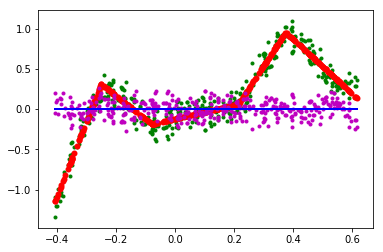

In [18]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
# plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)

In [19]:
i=-1
layer3.input.shape

(400, 2)

(-1.7178784459811746e-05, 0.007858019677470452)

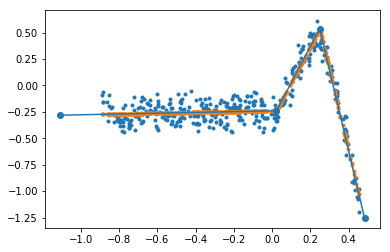

In [21]:
i+=1
a1 = layer2.input
a2 = layer3.input
da2 = layer2.del_output
a2_ = a2 - da2
plt.scatter(a1[:, i], a2_[:, i], marker='.')
plt.scatter(a1[:, i], a2[:, i], marker='.')
plt.plot(layer2.spline_list[i].X,  layer2.spline_list[i].Y, marker='o')
da2[:,i].mean(), da2[:,i].var()

In [20]:
da2.mean(axis=0)

array([-0.01616245, -0.01828838])

In [21]:
da2.std(axis=0)

array([0.28754388, 0.32536615])

In [23]:
layer2._increase_pieces_()